# Erdős-Rényi Random Graphs

## Theoretical Foundation

The Erdős-Rényi model, introduced by Paul Erdős and Alfréd Rényi in 1959, is one of the foundational models in random graph theory. It provides a mathematical framework for studying the properties of random networks and has profound implications for understanding phase transitions in complex systems.

### Model Definition

There are two closely related variants of the Erdős-Rényi model:

**$G(n, M)$ Model:** A graph is chosen uniformly at random from the collection of all graphs with $n$ vertices and $M$ edges.

**$G(n, p)$ Model:** A graph on $n$ vertices where each possible edge is included independently with probability $p$.

We focus on the $G(n, p)$ model due to its analytical tractability.

### Key Properties

#### Expected Number of Edges

For a graph $G(n, p)$, the total number of possible edges is $\binom{n}{2} = \frac{n(n-1)}{2}$.

The expected number of edges is:
$$\mathbb{E}[|E|] = p \cdot \binom{n}{2} = \frac{p \cdot n(n-1)}{2}$$

#### Degree Distribution

Each vertex has degree following a binomial distribution:
$$P(\deg(v) = k) = \binom{n-1}{k} p^k (1-p)^{n-1-k}$$

The expected degree of any vertex is:
$$\mathbb{E}[\deg(v)] = (n-1) \cdot p$$

For large $n$ with $p = \lambda/n$ (sparse regime), this converges to a Poisson distribution:
$$P(\deg(v) = k) \approx \frac{\lambda^k e^{-\lambda}}{k!}$$

### Phase Transition: Giant Component

One of the most celebrated results in random graph theory is the emergence of a **giant connected component**.

Let $c = np$ be the average degree. Then:

- **Subcritical phase** ($c < 1$): All connected components have size $O(\log n)$
- **Critical point** ($c = 1$): Largest component has size $O(n^{2/3})$
- **Supercritical phase** ($c > 1$): A unique giant component emerges with size $\Theta(n)$

The fraction $S$ of vertices in the giant component satisfies:
$$S = 1 - e^{-cS}$$

This is a transcendental equation that has a non-trivial solution only when $c > 1$.

### Clustering Coefficient

The local clustering coefficient for Erdős-Rényi graphs is:
$$C = p$$

This is because edges form independently, so the probability that two neighbors of a vertex are connected is simply $p$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import connected_components
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

def generate_erdos_renyi(n, p):
    """
    Generate an Erdős-Rényi random graph G(n, p).
    
    Parameters:
    -----------
    n : int
        Number of vertices
    p : float
        Edge probability
    
    Returns:
    --------
    adj_matrix : scipy.sparse matrix
        Adjacency matrix of the graph
    """
    adj_matrix = lil_matrix((n, n), dtype=np.int8)
    
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.random() < p:
                adj_matrix[i, j] = 1
                adj_matrix[j, i] = 1
    
    return adj_matrix.tocsr()

def compute_degree_distribution(adj_matrix):
    """
    Compute the degree distribution of a graph.
    """
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    return degrees

def get_component_sizes(adj_matrix):
    """
    Get sizes of all connected components.
    """
    n_components, labels = connected_components(adj_matrix, directed=False)
    sizes = Counter(labels)
    return sorted(sizes.values(), reverse=True)

print("Functions defined successfully.")

Functions defined successfully.


## Numerical Experiments

### Experiment 1: Phase Transition Analysis

We investigate the emergence of the giant component by varying the edge probability $p$ around the critical threshold $p_c = 1/n$.

In [2]:
# Phase transition experiment
n = 1000  # Number of vertices
c_values = np.linspace(0.1, 3.0, 30)  # Average degree values
p_values = c_values / n

giant_component_fractions = []
second_component_fractions = []

print("Running phase transition analysis...")
for i, p in enumerate(p_values):
    # Generate graph
    adj = generate_erdos_renyi(n, p)
    
    # Get component sizes
    sizes = get_component_sizes(adj)
    
    # Record largest and second-largest component fractions
    giant_component_fractions.append(sizes[0] / n)
    if len(sizes) > 1:
        second_component_fractions.append(sizes[1] / n)
    else:
        second_component_fractions.append(0)
    
    if (i + 1) % 10 == 0:
        print(f"  Completed {i + 1}/{len(p_values)} simulations")

print("Phase transition analysis complete.")

Running phase transition analysis...


  Completed 10/30 simulations


  Completed 20/30 simulations


  Completed 30/30 simulations
Phase transition analysis complete.


In [3]:
# Theoretical prediction for giant component size
def theoretical_giant_component(c):
    """
    Solve S = 1 - exp(-cS) for the giant component fraction.
    """
    if c <= 1:
        return 0
    
    # Newton's method to solve S = 1 - exp(-cS)
    S = 0.5
    for _ in range(100):
        f = S - 1 + np.exp(-c * S)
        df = 1 + c * np.exp(-c * S)
        S = S - f / df
        if abs(f) < 1e-10:
            break
    return max(0, S)

c_theory = np.linspace(0.1, 3.0, 200)
S_theory = [theoretical_giant_component(c) for c in c_theory]

print("Theoretical predictions computed.")

Theoretical predictions computed.


### Experiment 2: Degree Distribution Analysis

We examine the degree distribution and compare it to the theoretical Poisson prediction.

In [4]:
# Generate a graph for degree distribution analysis
n_deg = 5000
c_deg = 5  # Average degree
p_deg = c_deg / n_deg

print(f"Generating graph with n={n_deg}, c={c_deg}...")
adj_deg = generate_erdos_renyi(n_deg, p_deg)
degrees = compute_degree_distribution(adj_deg)

# Compute empirical distribution
degree_counts = Counter(degrees)
max_degree = max(degrees)
k_values = np.arange(0, max_degree + 1)
empirical_dist = np.array([degree_counts.get(k, 0) / n_deg for k in k_values])

# Theoretical Poisson distribution
from scipy.stats import poisson
lambda_param = c_deg
theoretical_dist = poisson.pmf(k_values, lambda_param)

print(f"Mean degree: {np.mean(degrees):.2f} (expected: {c_deg})")
print(f"Variance: {np.var(degrees):.2f} (expected for Poisson: {c_deg})")

Generating graph with n=5000, c=5...


Mean degree: 5.00 (expected: 5)
Variance: 5.00 (expected for Poisson: 5)


## Visualization

We now create a comprehensive visualization showing:
1. Phase transition of the giant component
2. Degree distribution comparison with Poisson
3. Graph structure visualization
4. Component size distribution

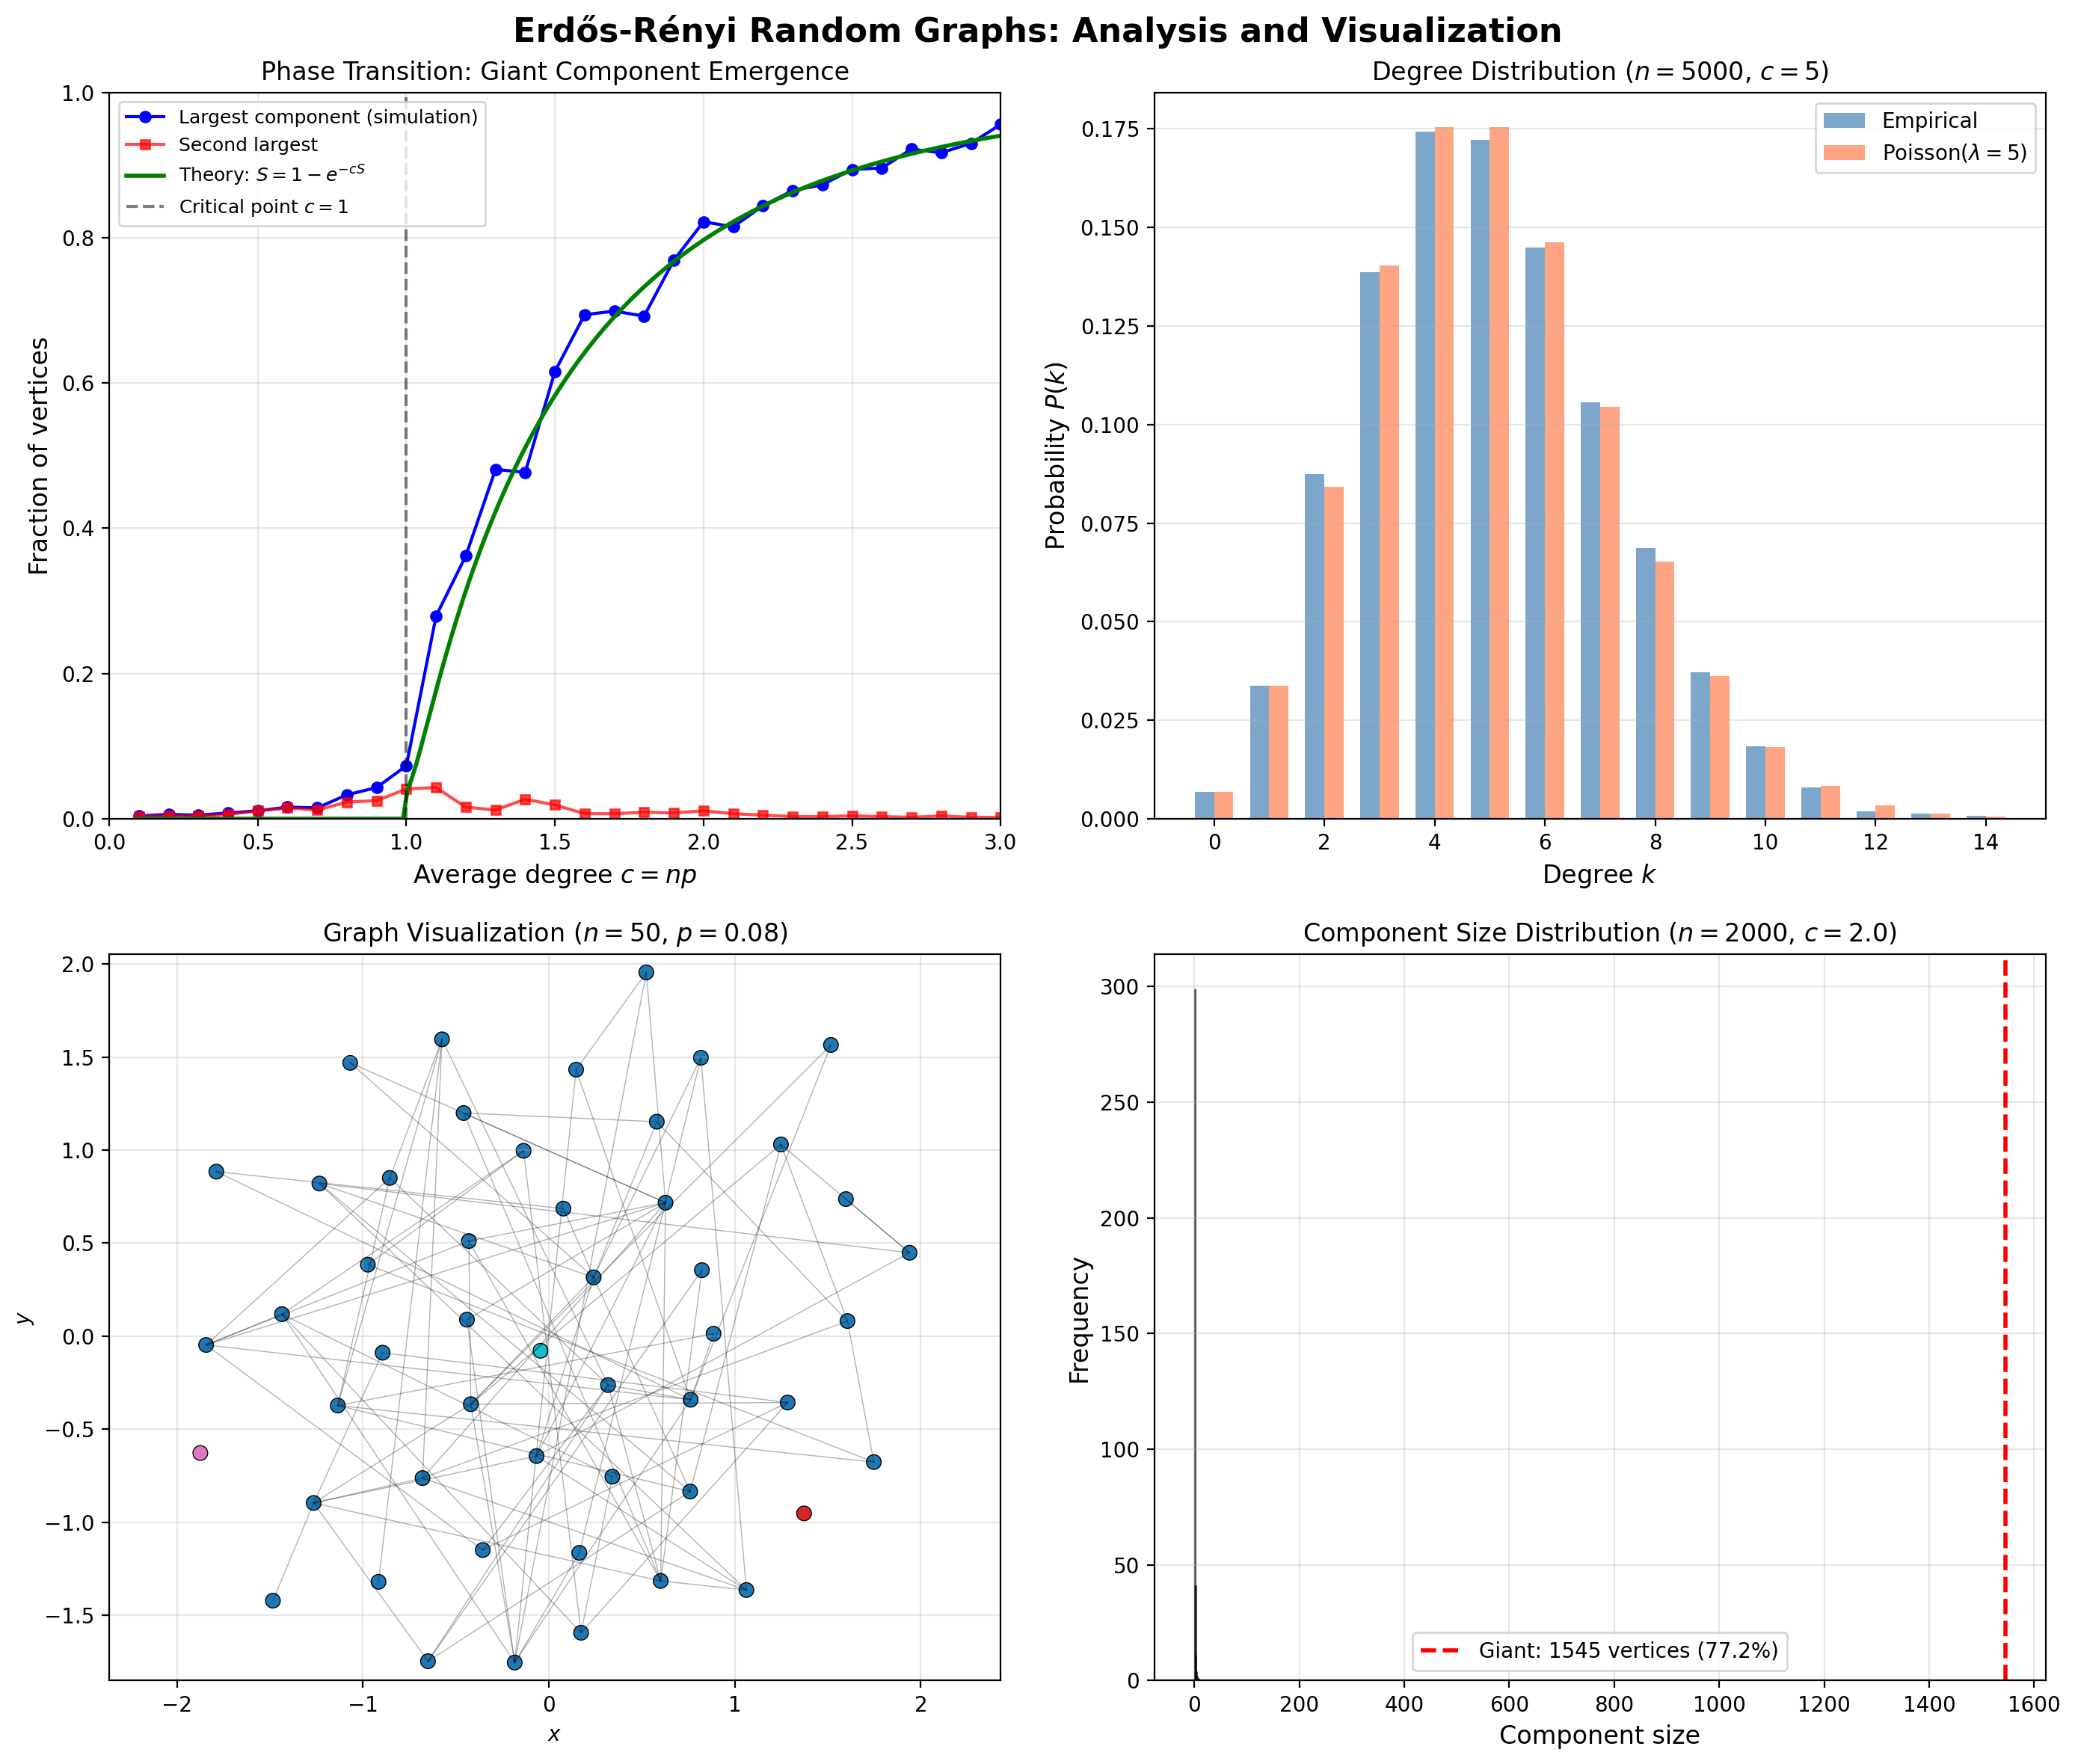


Visualization saved to 'plot.png'


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Erdős-Rényi Random Graphs: Analysis and Visualization', fontsize=16, fontweight='bold')

# Plot 1: Phase Transition
ax1 = axes[0, 0]
ax1.plot(c_values, giant_component_fractions, 'bo-', markersize=5, label='Largest component (simulation)')
ax1.plot(c_values, second_component_fractions, 'rs-', markersize=4, alpha=0.7, label='Second largest')
ax1.plot(c_theory, S_theory, 'g-', linewidth=2, label='Theory: $S = 1 - e^{-cS}$')
ax1.axvline(x=1, color='k', linestyle='--', alpha=0.5, label='Critical point $c=1$')
ax1.set_xlabel('Average degree $c = np$', fontsize=12)
ax1.set_ylabel('Fraction of vertices', fontsize=12)
ax1.set_title('Phase Transition: Giant Component Emergence', fontsize=12)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 1)

# Plot 2: Degree Distribution
ax2 = axes[0, 1]
k_plot = k_values[k_values <= 15]
emp_plot = empirical_dist[:len(k_plot)]
theo_plot = theoretical_dist[:len(k_plot)]

width = 0.35
ax2.bar(k_plot - width/2, emp_plot, width, label='Empirical', alpha=0.7, color='steelblue')
ax2.bar(k_plot + width/2, theo_plot, width, label='Poisson($\lambda=5$)', alpha=0.7, color='coral')
ax2.set_xlabel('Degree $k$', fontsize=12)
ax2.set_ylabel('Probability $P(k)$', fontsize=12)
ax2.set_title(f'Degree Distribution ($n={n_deg}$, $c={c_deg}$)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Small graph visualization
ax3 = axes[1, 0]
n_small = 50
p_small = 0.08
adj_small = generate_erdos_renyi(n_small, p_small)

# Spring layout positioning
np.random.seed(123)
pos = np.random.randn(n_small, 2)

# Simple force-directed layout
for _ in range(50):
    # Repulsion between all pairs
    diff = pos[:, np.newaxis, :] - pos[np.newaxis, :, :]
    dist = np.sqrt((diff**2).sum(axis=2)) + 0.01
    repulsion = (diff / dist[:, :, np.newaxis]**3).sum(axis=1)
    
    # Attraction along edges
    attraction = np.zeros_like(pos)
    rows, cols = adj_small.nonzero()
    for i, j in zip(rows, cols):
        d = pos[j] - pos[i]
        attraction[i] += 0.1 * d
    
    pos += 0.01 * (repulsion * 0.5 + attraction)

# Normalize positions
pos = (pos - pos.mean(axis=0)) / pos.std()

# Draw edges
rows, cols = adj_small.nonzero()
for i, j in zip(rows, cols):
    if i < j:
        ax3.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], 'k-', alpha=0.3, linewidth=0.5)

# Color nodes by component
n_comp, labels = connected_components(adj_small, directed=False)
scatter = ax3.scatter(pos[:, 0], pos[:, 1], c=labels, cmap='tab10', s=50, edgecolors='black', linewidth=0.5)
ax3.set_title(f'Graph Visualization ($n={n_small}$, $p={p_small}$)', fontsize=12)
ax3.set_xlabel('$x$', fontsize=10)
ax3.set_ylabel('$y$', fontsize=10)
ax3.axis('equal')
ax3.grid(True, alpha=0.3)

# Plot 4: Component size distribution in supercritical regime
ax4 = axes[1, 1]
n_comp_analysis = 2000
c_super = 2.0
p_super = c_super / n_comp_analysis
adj_super = generate_erdos_renyi(n_comp_analysis, p_super)
comp_sizes = get_component_sizes(adj_super)

# Histogram of component sizes (excluding giant)
if len(comp_sizes) > 1:
    small_components = comp_sizes[1:]  # Exclude giant component
    ax4.hist(small_components, bins=30, color='purple', alpha=0.7, edgecolor='black')
    ax4.axvline(x=comp_sizes[0], color='red', linestyle='--', linewidth=2, 
                label=f'Giant: {comp_sizes[0]} vertices ({comp_sizes[0]/n_comp_analysis*100:.1f}%)')
else:
    ax4.text(0.5, 0.5, 'Single component', ha='center', va='center', transform=ax4.transAxes)

ax4.set_xlabel('Component size', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title(f'Component Size Distribution ($n={n_comp_analysis}$, $c={c_super}$)', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('random_graph_erdos_renyi_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Summary and Conclusions

This notebook demonstrated the fundamental properties of Erdős-Rényi random graphs:

1. **Phase Transition**: We observed the sharp transition at $c = np = 1$, where a giant connected component emerges. Our numerical simulations closely match the theoretical prediction $S = 1 - e^{-cS}$.

2. **Degree Distribution**: In the sparse regime, the degree distribution converges to a Poisson distribution, as predicted by theory. This is a consequence of the independence of edge formations.

3. **Graph Structure**: The visualization shows the typical structure of an Erdős-Rényi graph, with multiple components that eventually merge into a giant component as $p$ increases.

4. **Component Distribution**: In the supercritical regime, there is one giant component containing a macroscopic fraction of vertices, while the remaining vertices form small components.

### Further Reading

- Erdős, P. & Rényi, A. (1959). "On Random Graphs I"
- Bollobás, B. (2001). "Random Graphs"
- Newman, M. E. J. (2010). "Networks: An Introduction"